# !!! ATTENTION !!!
My PC takes about about 10 minutes to run every cell of the notebook.

# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.1.2


In [2]:
#load the required packages
%matplotlib inline

import           sklearn
import             numpy as  np
import             scipy as  sp
import            pandas as  pd
import matplotlib.pyplot as plt

import   sklearn.metrics as skm

from sklearn.datasets       import  fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition  import           PCA

In [3]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [4]:
ID = 2062889
np.random.seed(ID)

In [5]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [6]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [56 58 56 51 73 65 54 61 58 68]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [56 58 56 51 73 65 54 61 58 68]


In [7]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


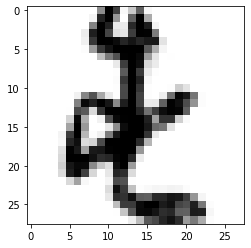

LABEL: 2
INPUT:


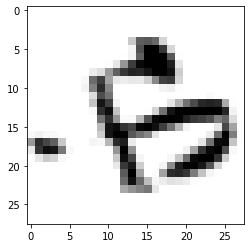

LABEL: 7
INPUT:


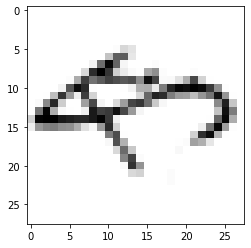

LABEL: 7


In [8]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [9]:
#Grid Search for number of hidden layers
import pandas as pd

parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (10,10,), (20,20,), (30,30,), 
                                     (40,40,), (50,50,), (10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50)]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gridSearchLayers = GridSearchCV(mlp, param_grid = parameters, cv = 5)
gridSearchLayers.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridSearchLayers.best_params_, "\n")

print("Score with best parameters:")
print(gridSearchLayers.best_score_)

print("\nAll scores on the grid:")
#print(pd.DataFrame.from_dict(gridSearchLayers.cv_results_))

hiddenLayersGrid = pd.DataFrame.from_dict(gridSearchLayers.cv_results_)
hiddenLayersGrid

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (30, 30)} 

Score with best parameters:
0.7616666666666666

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.303765,0.041353,0.000810,0.000155,"(10,)","{'hidden_layer_sizes': (10,)}",0.733333,0.666667,0.641667,0.758333,0.633333,0.686667,0.050166,13
1,0.279781,0.020276,0.000722,0.000043,"(20,)","{'hidden_layer_sizes': (20,)}",0.791667,0.741667,0.725000,0.791667,0.691667,0.748333,0.038873,4
2,0.309571,0.022682,0.000862,0.000117,"(30,)","{'hidden_layer_sizes': (30,)}",0.775000,0.700000,0.750000,0.791667,0.666667,0.736667,0.046726,9
3,0.314139,0.014918,0.000809,0.000095,"(40,)","{'hidden_layer_sizes': (40,)}",0.808333,0.750000,0.733333,0.791667,0.708333,0.758333,0.036893,2
4,0.325459,0.009079,0.000820,0.000045,"(50,)","{'hidden_layer_sizes': (50,)}",0.808333,0.733333,0.750000,0.783333,0.666667,0.748333,0.048419,4
5,0.227157,0.023120,0.000667,0.000021,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.758333,0.716667,0.683333,0.683333,0.616667,0.691667,0.046547,12
6,0.226529,0.013639,0.000977,0.000336,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.716667,0.683333,0.683333,0.791667,0.675000,0.710000,0.043269,10
7,0.283349,0.024253,0.000923,0.000128,"(30, 30)","{'hidden_layer_sizes': (30, 30)}",0.791667,0.733333,0.758333,0.791667,0.733333,0.761667,0.026141,1
8,0.259535,0.011165,0.000870,0.000130,"(40, 40)","{'hidden_layer_sizes': (40, 40)}",0.783333,0.758333,0.716667,0.791667,0.691667,0.748333,0.038514,4
9,0.285622,0.026411,0.001066,0.000156,"(50, 50)","{'hidden_layer_sizes': (50, 50)}",0.783333,0.725000,0.733333,0.791667,0.691667,0.745000,0.037491,8


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [10]:
# Grid Search for batch size
parameters = {'batch_size': [4, 12, 24, 48, 96, 240, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

gridSearchBatch = GridSearchCV(mlp, param_grid = parameters, cv = kf)
gridSearchBatch.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridSearchBatch.best_params_, "\n")

print("Score with best parameters:")
print(gridSearchBatch.best_score_)

print("\nAll scores on the grid:")
#print(pd.DataFrame.from_dict(gridSearchBatch.cv_results_))

batchSizeGrid = pd.DataFrame.from_dict(gridSearchBatch.cv_results_)
batchSizeGrid

RESULTS FOR NN

Best parameters set found:
{'batch_size': 24} 

Score with best parameters:
0.7583333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.973723,0.275395,0.001030,0.000084,4,{'batch_size': 4},0.125000,0.158333,0.125000,0.200000,0.066667,0.135000,0.043906,7
1,2.007421,0.970997,0.001323,0.000468,12,{'batch_size': 12},0.733333,0.708333,0.725000,0.775000,0.691667,0.726667,0.028087,6
2,0.612607,0.019875,0.001030,0.000143,24,{'batch_size': 24},0.816667,0.758333,0.708333,0.791667,0.716667,0.758333,0.041833,1
3,0.530967,0.020831,0.000981,0.000040,48,{'batch_size': 48},0.791667,0.733333,0.733333,0.766667,0.691667,0.743333,0.033912,2
4,0.445450,0.014119,0.001114,0.000106,96,{'batch_size': 96},0.775000,0.725000,0.750000,0.758333,0.666667,0.735000,0.037786,4
5,0.484969,0.019994,0.001050,0.000064,240,{'batch_size': 240},0.775000,0.725000,0.750000,0.758333,0.666667,0.735000,0.037786,4
6,0.550141,0.020498,0.001036,0.000070,480,{'batch_size': 480},0.783333,0.733333,0.750000,0.758333,0.675000,0.740000,0.036286,3


In [11]:
# ATTENTION: This cell takes around 5 minutes to run
# Big grid search for both hidden layers and batch size
parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (10,10,), (20,20,), (30,30,), 
                                     (40,40,), (50,50,), (10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50)],
              'batch_size': [4, 12, 24, 48, 96, 240, 480]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

gridSearchBatchLayers = GridSearchCV(mlp, param_grid=parameters, cv=kf)
gridSearchBatchLayers.fit(X_train, y_train)

best_layer_size = gridSearchBatchLayers.best_params_['hidden_layer_sizes']
best_batch_size = gridSearchBatchLayers.best_params_['batch_size']

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridSearchBatchLayers.best_params_)

print("Score with best parameters:")
print(gridSearchBatchLayers.best_score_)

print("\nAll scores on the grid:")
#print(gridSearchBatchLayers.cv_results_)

batchLayersGrid = pd.DataFrame.from_dict(gridSearchBatchLayers.cv_results_)
batchLayersGrid

RESULTS FOR NN

Best parameters set found:
{'batch_size': 24, 'hidden_layer_sizes': (30,)}
Score with best parameters:
0.7549999999999999

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.827988,0.222462,0.000915,0.000175,4,"(10,)","{'batch_size': 4, 'hidden_layer_sizes': (10,)}",0.091667,0.083333,0.100000,0.091667,0.175000,0.108333,0.033747,93
1,1.069499,0.341479,0.000825,0.000131,4,"(20,)","{'batch_size': 4, 'hidden_layer_sizes': (20,)}",0.125000,0.041667,0.100000,0.075000,0.075000,0.083333,0.027889,103
2,1.033685,0.379892,0.000776,0.000057,4,"(30,)","{'batch_size': 4, 'hidden_layer_sizes': (30,)}",0.033333,0.091667,0.100000,0.191667,0.075000,0.098333,0.052015,98
3,1.885963,0.111040,0.000792,0.000079,4,"(40,)","{'batch_size': 4, 'hidden_layer_sizes': (40,)}",0.108333,0.125000,0.158333,0.158333,0.241667,0.158333,0.045947,87
4,1.132027,0.084020,0.000885,0.000095,4,"(50,)","{'batch_size': 4, 'hidden_layer_sizes': (50,)}",0.158333,0.091667,0.083333,0.116667,0.041667,0.098333,0.038514,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.265197,0.218810,0.000742,0.000049,480,"(10, 10, 10)","{'batch_size': 480, 'hidden_layer_sizes': (10,...",0.375000,0.400000,0.458333,0.666667,0.408333,0.461667,0.106014,75
101,0.229001,0.158676,0.000766,0.000003,480,"(20, 20, 20)","{'batch_size': 480, 'hidden_layer_sizes': (20,...",0.716667,0.283333,0.425000,0.691667,0.508333,0.525000,0.163214,69
102,0.283523,0.086418,0.000873,0.000079,480,"(30, 30, 30)","{'batch_size': 480, 'hidden_layer_sizes': (30,...",0.741667,0.600000,0.691667,0.700000,0.600000,0.666667,0.057009,54
103,0.169006,0.107388,0.000859,0.000006,480,"(40, 40, 40)","{'batch_size': 480, 'hidden_layer_sizes': (40,...",0.783333,0.550000,0.458333,0.391667,0.650000,0.566667,0.138944,67


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## ANSWER QUESTION 1
For the number of hidden layers parameter we initially get an optimal value of (30,30). We also notice that given an equal number of layers the neural network seems to favor the ones with more neurons per layer. For the batch size the optimal parameter seems to be 24 and from the mean validation scores we notice that all the values would work fine, apart from the batch size of 4, which seems to be quite bad when compared to the others. I separatly checked also the batch size = 1 and the results for it are even worse than the batch size = 4, I didnt include the checks for the single batch size in this notebook because I noticed that the trining time for the neural networks with this parameter increses by a factor between 10 and 100, so it would have slowed the grid searches quite a bit. Lastly I performed an extra grid check over the number of hidden layers and batch size and found that best hyperparameters configuration is actually: Number of hidden layers: Single layer with 30 neurons so (30,), Batch size: 24. Also by increasing the number of iteration to 1000 I managed to get the convergence for every batch size tried. 

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.74 sec

Training MLP of size (20,) ...
Done, training time: 1.13 sec

Training MLP of size (30,) ...
Done, training time: 0.69 sec

Training MLP of size (40,) ...
Done, training time: 0.75 sec

Training MLP of size (50,) ...
Done, training time: 0.71 sec

Training MLP of size (10, 10) ...
Done, training time: 0.55 sec

Training MLP of size (20, 20) ...
Done, training time: 0.73 sec

Training MLP of size (30, 30) ...
Done, training time: 0.48 sec

Training MLP of size (40, 40) ...
Done, training time: 0.80 sec

Training MLP of size (50, 50) ...
Done, training time: 0.65 sec

Training MLP of size (10, 10, 10) ...
Done, training time: 0.27 sec

Training MLP of size (20, 20, 20) ...
Done, training time: 0.49 sec

Training MLP of size (30, 30, 30) ...
Done, training time: 0.47 sec

Training MLP of size (40, 40, 40) ...
Done, training time: 0.70 sec

Training MLP of size (50, 50, 50) ...
Done, training time: 0.67 sec



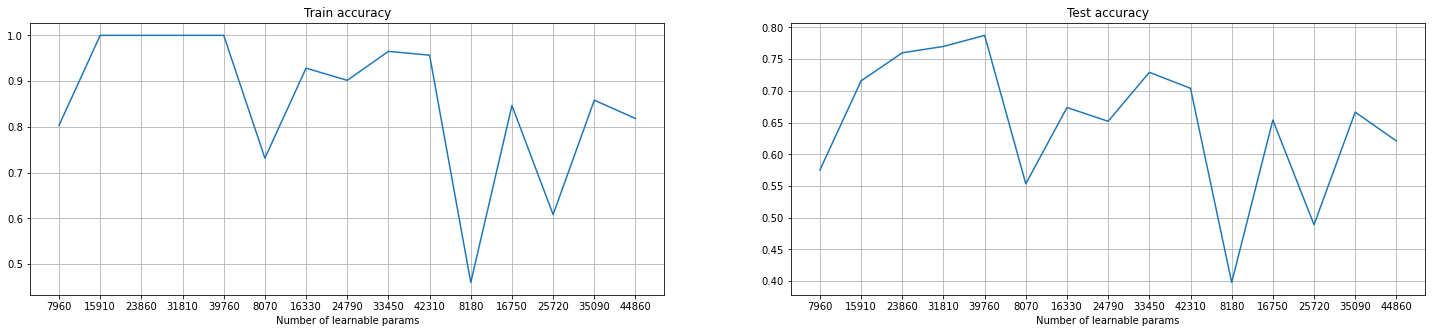

In [12]:
#Graphs of train and test accuracies as a function of number of learnable parameters

import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (40,), (50,), (10,10,), (20,20,), (30,30,), (40,40,), (50,50,), (10,10,10), 
            (20,20,20), (30,30,30), (40,40,40), (50,50,50)]

hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []

for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, 
                    batch_size=gridSearchBatch.best_params_["batch_size"],
                    max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

    mlp.fit(X_train, y_train)

    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(25,5))    
    
ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)  

Training MLP of batch size 4 ...
Done, training time: 1.25 sec

Training MLP of batch size 12 ...
Done, training time: 0.77 sec

Training MLP of batch size 24 ...
Done, training time: 0.48 sec

Training MLP of batch size 48 ...
Done, training time: 0.41 sec

Training MLP of batch size 96 ...
Done, training time: 0.39 sec

Training MLP of batch size 240 ...
Done, training time: 0.44 sec

Training MLP of batch size 480 ...
Done, training time: 0.48 sec



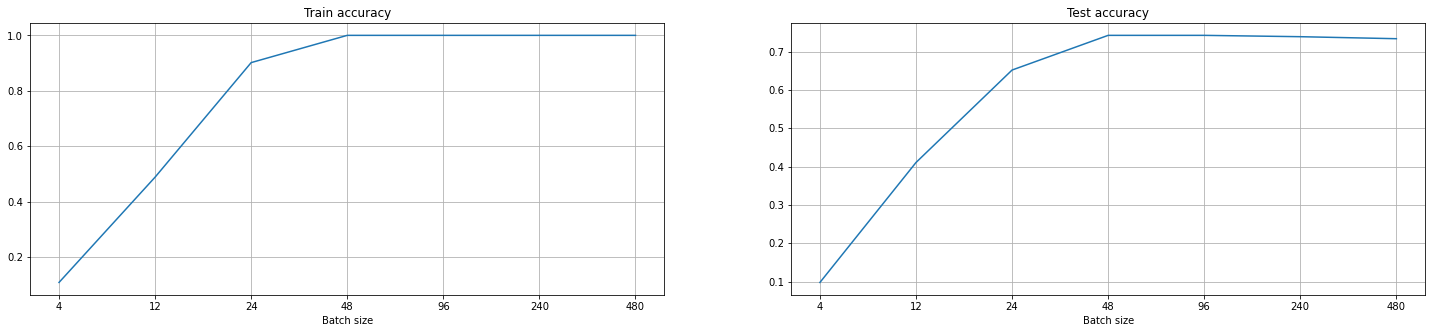

In [13]:
#Graphs of train and test accuracies as a function of the batch size

batch_sizes = [4, 12, 24, 48, 96, 240, 480]

ti = time.time()
train_acc_list, test_acc_list = [], []

for batch_size in batch_sizes:
    print('Training MLP of batch size {} ...'.format(batch_size))
    
    mlp = MLPClassifier(hidden_layer_sizes=gridSearchLayers.best_params_["hidden_layer_sizes"], 
                    batch_size=batch_size,
                    max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

    mlp.fit(X_train, y_train)

    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(25,5))    
    
ax[0].plot(train_acc_list)
ax[0].set_xlabel('Batch size')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(batch_sizes)))
ax[0].set_xticklabels(batch_sizes)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Batch size')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(batch_sizes)))
ax[1].set_xticklabels(batch_sizes)
ax[1].grid(True)

Training MLP of size (10,) and batch size 4 ...
Done, training time: 0.65 sec

Training MLP of size (20,) and batch size 4 ...
Done, training time: 0.80 sec

Training MLP of size (30,) and batch size 4 ...
Done, training time: 1.88 sec

Training MLP of size (40,) and batch size 4 ...
Done, training time: 1.93 sec

Training MLP of size (50,) and batch size 4 ...
Done, training time: 2.42 sec

Training MLP of size (10, 10) and batch size 4 ...
Done, training time: 1.42 sec

Training MLP of size (20, 20) and batch size 4 ...
Done, training time: 1.62 sec

Training MLP of size (30, 30) and batch size 4 ...
Done, training time: 1.26 sec

Training MLP of size (40, 40) and batch size 4 ...
Done, training time: 2.43 sec

Training MLP of size (50, 50) and batch size 4 ...
Done, training time: 2.06 sec

Training MLP of size (10, 10, 10) and batch size 4 ...
Done, training time: 1.32 sec

Training MLP of size (20, 20, 20) and batch size 4 ...
Done, training time: 1.46 sec

Training MLP of size (3

/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.49 sec

Training MLP of size (20,) and batch size 240 ...
Done, training time: 0.37 sec

Training MLP of size (30,) and batch size 240 ...
Done, training time: 0.43 sec

Training MLP of size (40,) and batch size 240 ...
Done, training time: 0.45 sec

Training MLP of size (50,) and batch size 240 ...
Done, training time: 0.53 sec

Training MLP of size (10, 10) and batch size 240 ...
Done, training time: 0.38 sec

Training MLP of size (20, 20) and batch size 240 ...
Done, training time: 0.38 sec

Training MLP of size (30, 30) and batch size 240 ...
Done, training time: 0.40 sec

Training MLP of size (40, 40) and batch size 240 ...
Done, training time: 0.36 sec

Training MLP of size (50, 50) and batch size 240 ...
Done, training time: 0.38 sec

Training MLP of size (10, 10, 10) and batch size 240 ...
Done, training time: 0.16 sec

Training MLP of size (20, 20, 20) and batch size 240 ...
Done, training time: 0.37 sec

Training MLP of size (30, 30, 30) and batch size 

/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.42 sec

Training MLP of size (20,) and batch size 480 ...


/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.36 sec

Training MLP of size (30,) and batch size 480 ...
Done, training time: 0.43 sec

Training MLP of size (40,) and batch size 480 ...
Done, training time: 0.46 sec

Training MLP of size (50,) and batch size 480 ...
Done, training time: 0.50 sec

Training MLP of size (10, 10) and batch size 480 ...
Done, training time: 0.33 sec

Training MLP of size (20, 20) and batch size 480 ...
Done, training time: 0.39 sec

Training MLP of size (30, 30) and batch size 480 ...
Done, training time: 0.43 sec

Training MLP of size (40, 40) and batch size 480 ...
Done, training time: 0.43 sec

Training MLP of size (50, 50) and batch size 480 ...
Done, training time: 0.41 sec

Training MLP of size (10, 10, 10) and batch size 480 ...
Done, training time: 0.20 sec

Training MLP of size (20, 20, 20) and batch size 480 ...
Done, training time: 0.38 sec

Training MLP of size (30, 30, 30) and batch size 480 ...
Done, training time: 0.36 sec

Training MLP of size (40, 40, 40) and batc

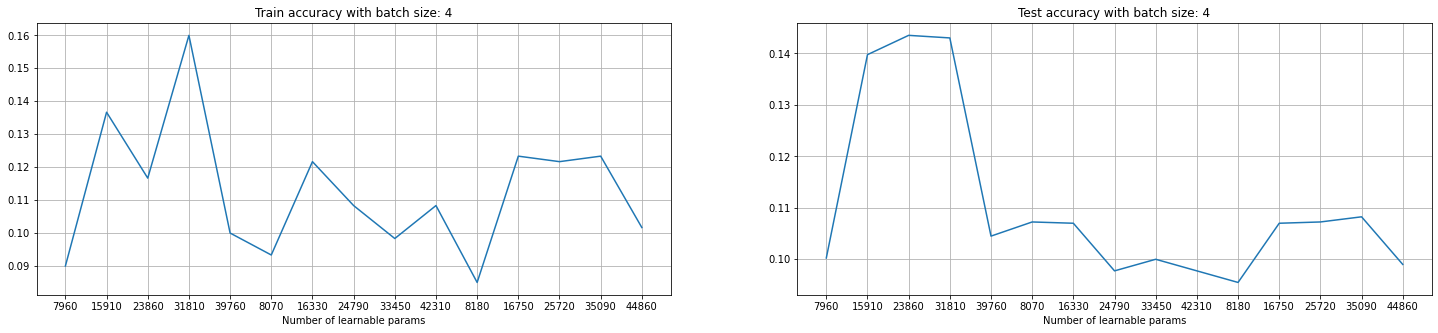

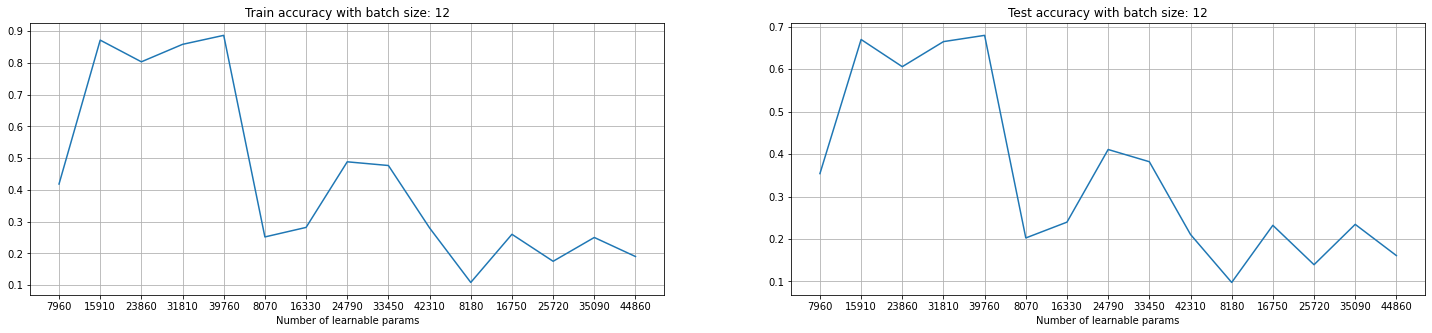

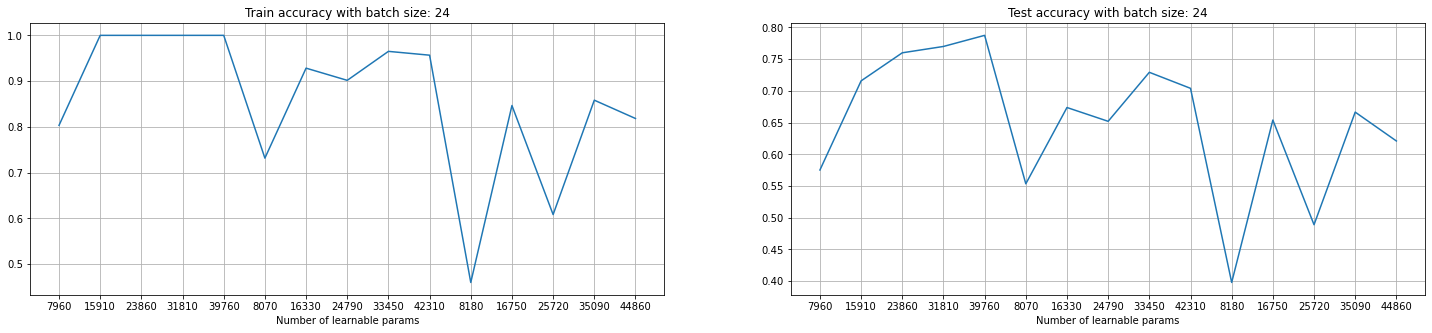

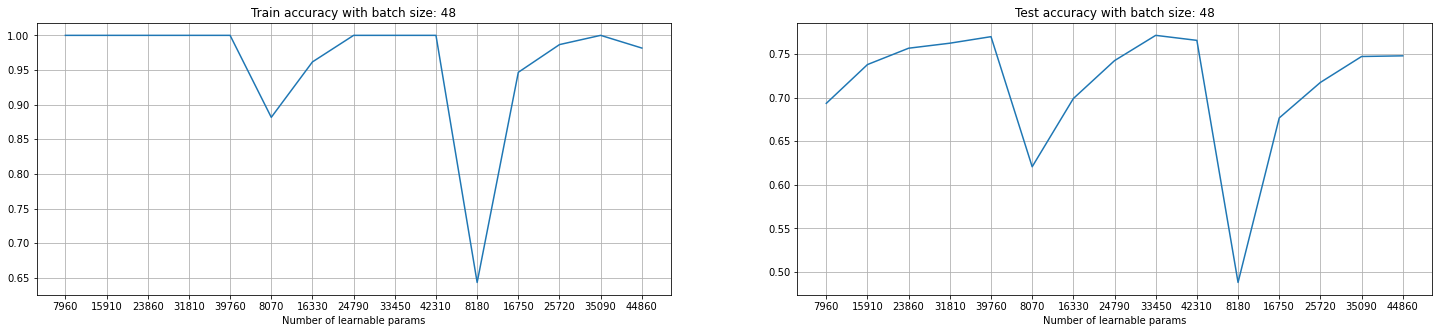

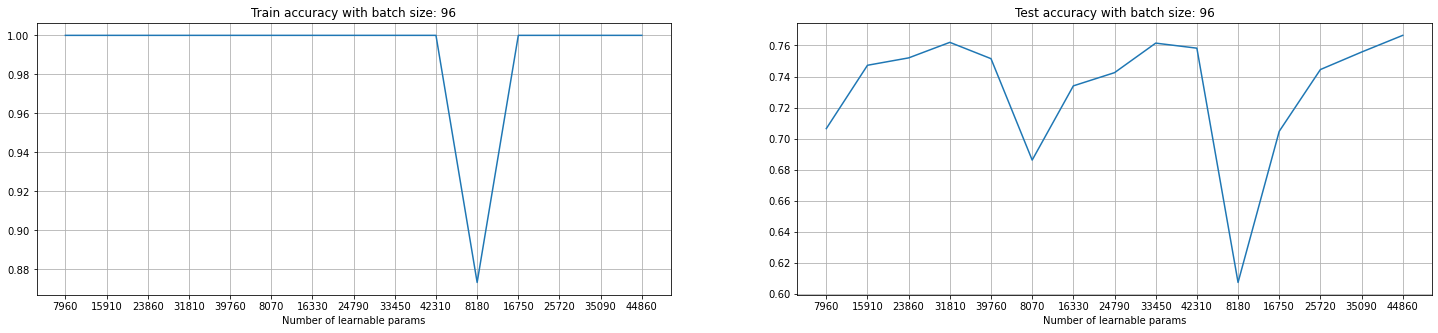

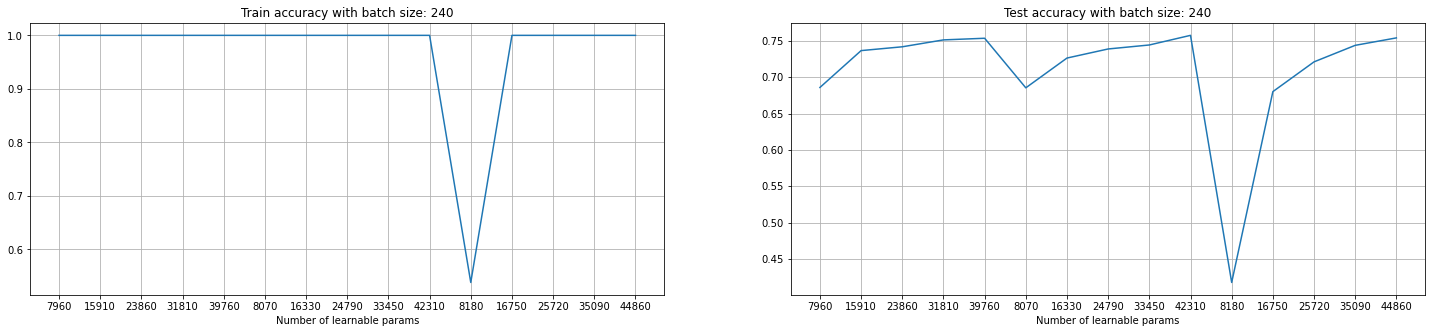

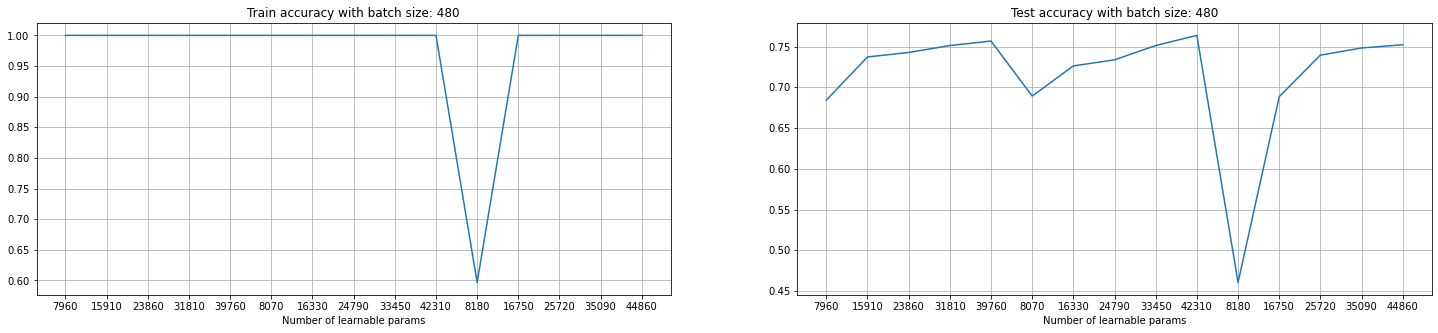

In [14]:
#Graphs of train and test accuracies as a function of both the number of learnable parameters and batch size
ti = time.time()

for batch_size in batch_sizes:
    train_acc_list, test_acc_list = [], []
    for hl_size in hl_sizes:
        
        print('Training MLP of size {} and batch size '.format(hl_size)+str(batch_size), '...')

        mlp = MLPClassifier(hidden_layer_sizes=hl_size, 
                        batch_size=batch_size,
                        max_iter=100, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=.1)

        mlp.fit(X_train, y_train)

        train_acc_list.append(mlp.score(X_train, y_train))
        test_acc_list.append(mlp.score(X_test, y_test))
        print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
        ti = time.time()
    
    fig, ax = plt.subplots(1,2, figsize=(25,5))    
    
    ax[0].plot(train_acc_list)
    ax[0].set_xlabel('Number of learnable params')
    ax[0].set_title('Train accuracy with batch size: '+str(batch_size))
    ax[0].set_xticks(np.arange(0,len(hl_labels)))
    ax[0].set_xticklabels(hl_labels)
    ax[0].grid(True)

    ax[1].plot(test_acc_list)
    ax[1].set_xlabel('Number of learnable params')
    ax[1].set_title('Test accuracy with batch size: '+str(batch_size))
    ax[1].set_xticks(np.arange(0,len(hl_labels)))
    ax[1].set_xticklabels(hl_labels)
    ax[1].grid(True)  

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## ANSWER QUESTION 2
From the accuracy graphs we see that the best performing neural network over the test set is actually the one with a single hidden layer of 50 neurons (50,) and batch size 24. From the graphs we notice the pattern also observed in the first question, given an equal number of layers the NN performs better when the hidden layers have more neurons. We also notice that both the training and test accuracies increase when we increase the batch size, until the value of 48, where it becomes stable. From the final optimal values of the 2 hyperparameters studied so far, a single hidden layer with batch size 24 we notice that we end up with a quite simple NN, this is expected since our classification problem is quite simple and more complicated NN, without the adequate precation, could lead to overfit, like we are observing during these grid searches.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

In [15]:
# Grid search for the learning rate
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
parameters = {'learning_rate_init': lr_list}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_size,
                    batch_size=best_batch_size)

gridSearchLearning = GridSearchCV(mlp, param_grid=parameters, cv=kf)
gridSearchLearning.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(gridSearchLearning.best_params_)
best_learning_rate = gridSearchLearning.best_params_['learning_rate_init']

print("Score with best parameters:")
print(gridSearchLearning.best_score_)

print("\nAll scores on the grid:")
#print(gridSearchLearning.cv_results_)

learningGrid = pd.DataFrame.from_dict(gridSearchLearning.cv_results_)
learningGrid

/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

Best parameters set found:
{'learning_rate_init': 0.02}
Score with best parameters:
0.7266666666666667

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,13.613585,0.343599,0.000826,0.000069,0.0002,{'learning_rate_init': 0.0002},0.741667,0.725,0.700000,0.766667,0.675000,0.721667,0.031885,2
1,3.406685,0.116329,0.000771,0.000056,0.002,{'learning_rate_init': 0.002},0.741667,0.725,0.716667,0.741667,0.675000,0.720000,0.024495,3
2,0.939354,0.030638,0.000790,0.000070,0.02,{'learning_rate_init': 0.02},0.766667,0.750,0.716667,0.733333,0.666667,0.726667,0.034319,1
3,0.419326,0.194735,0.000805,0.000055,0.2,{'learning_rate_init': 0.2},0.616667,0.675,0.683333,0.633333,0.566667,0.635000,0.042295,4


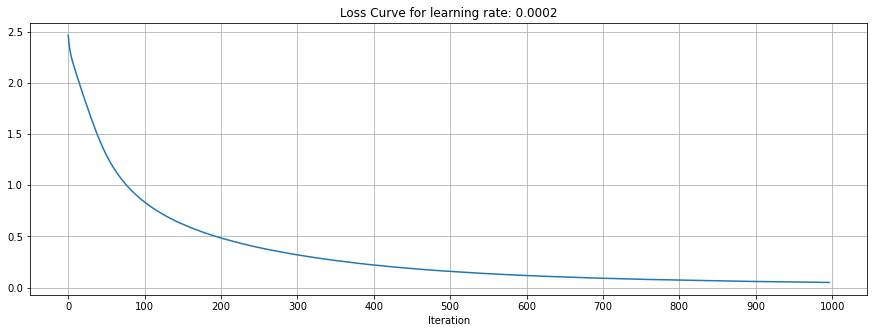

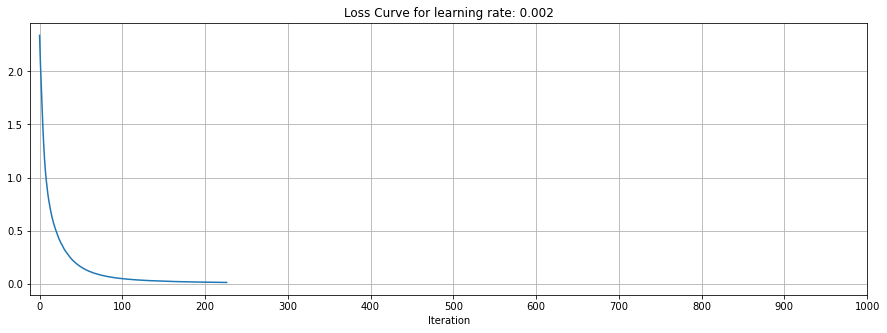

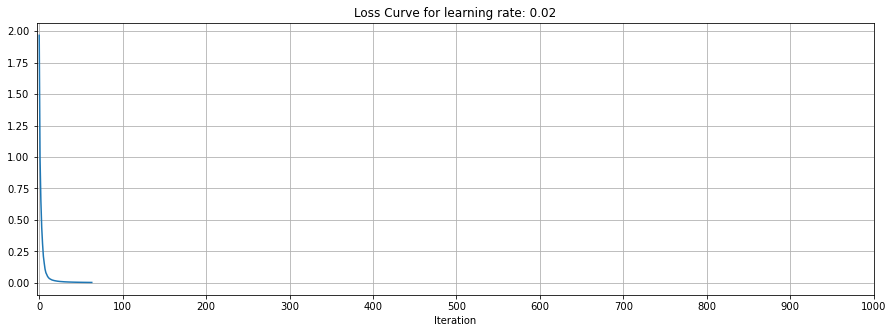

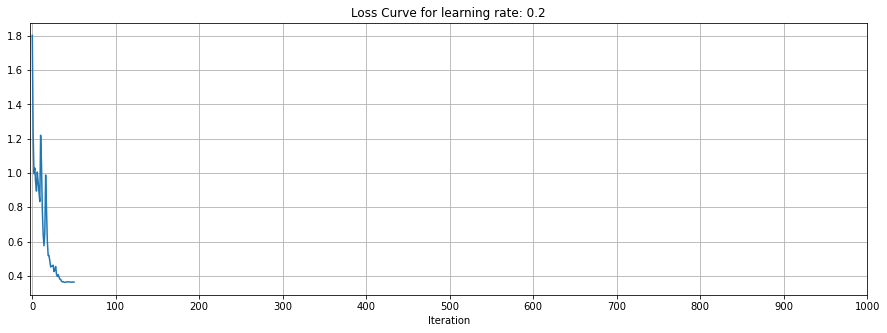

In [16]:
# Graph for the learning curve as a function of the number of iterations
scores = []

lr_list = [0.0002, 0.002, 0.02, 0.2]

for lr in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, 
                        batch_size=best_batch_size,
                        max_iter=1000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=lr)

    mlp.fit(X_train, y_train)
    scores.append(mlp.score(X_test, y_test))
    
    fig, ax = plt.subplots(1, figsize=(15,5))    
    
    ax.plot(mlp.loss_curve_)
    ax.set_xlabel('Iteration')
    ax.set_title('Loss Curve for learning rate: '+str(lr))
    ax.set_xticks(np.linspace(0,1000,11))
    #ax.set_xticklabels(np.linspace(0,1000,10))
    ax.grid(True)

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## ANSWER TO QUESTION 3
We observe that the number of iterations necessary for convergence decreases when the learning rate parameter increases. Of course this is due to two main factors, the fact that increasing the learning rate means "doing longer steps" when following the opposite direction of the gradient and to the fact that our problem is simple. In fact having a large learning rate leads to intability, like we are seeing from the last graph in the cell above, and in certain circumstances this could lead to difficulties to the correct identification of the minimum, and so to convergence. But our simple space doenst suffer from this problem and so a large learning rate works just fine. In any case the learning rate that yields the best results, in our case, is equal to 0.02.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.254250


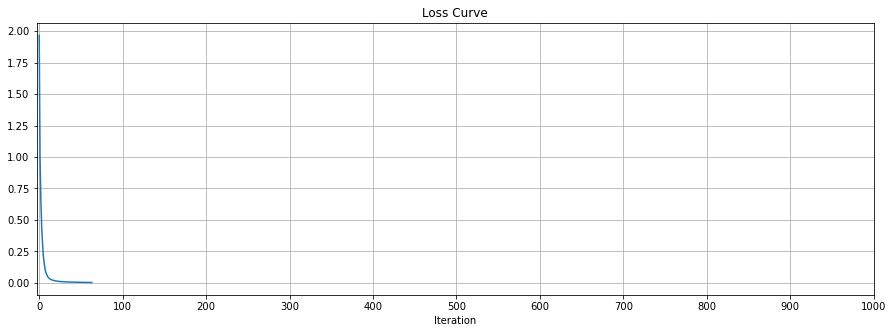

In [18]:
mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, 
                        batch_size=best_batch_size,
                        max_iter=1000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=best_learning_rate)

mlp.fit(X_train, y_train)

training_error = 1-mlp.score(X_train, y_train)
test_error = 1-mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(1, figsize=(15,5))    
    
ax.plot(mlp.loss_curve_)
ax.set_xlabel('Iteration')
ax.set_title('Loss Curve')
ax.set_xticks(np.linspace(0,1000,11))
#ax.set_xticklabels(np.linspace(0,100,10))
ax.grid(True)

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [19]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [389 440 425 399 398 390 381 389 411 378]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.02782042
Iteration 2, loss = 0.52599221
Iteration 3, loss = 0.41485714
Iteration 4, loss = 0.31908521
Iteration 5, loss = 0.25335099
Iteration 6, loss = 0.20108817
Iteration 7, loss = 0.15866881
Iteration 8, loss = 0.12065224
Iteration 9, loss = 0.09723064
Iteration 10, loss = 0.06969615
Iteration 11, loss = 0.05028499
Iteration 12, loss = 0.03865206
Iteration 13, loss = 0.02993978
Iteration 14, loss = 0.02347786
Iteration 15, loss = 0.01946996
Iteration 16, loss = 0.01603234
Iteration 17, loss = 0.01394777
Iteration 18, loss = 0.01241886
Iteration 19, loss = 0.01098066
Iteration 20, loss = 0.00987654
Iteration 21, loss = 0.00910150
Iteration 22, loss = 0.00823361
Iteration 23, loss = 0.00779129
Iteration 24, loss = 0.00723626
Iteration 25, loss = 0.00681664
Iteration 26, loss = 0.00642117
Iteration 27, loss = 0.00605787
Iteration 28, loss = 0.00578283
Iteration 29, loss = 0.00550505
Iteration 30, loss = 0.00523876
Iteration 31, loss = 0.00503881
Iteration 32, los

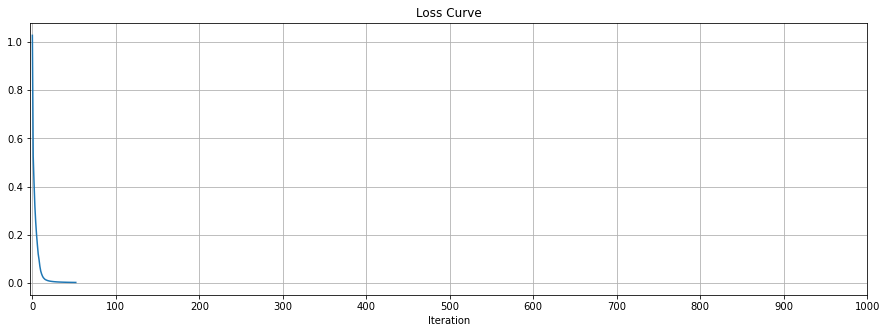

In [20]:
mlp_large = MLPClassifier(hidden_layer_sizes=best_layer_size, 
                        batch_size=best_batch_size,
                        max_iter=1000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=best_learning_rate,
                        verbose=True)

mlp_large.fit(X_train, y_train)

training_error = 1-mlp_large.score(X_train, y_train)
test_error = 1-mlp_large.score(X_test, y_test)

print ('\nRESULTS FOR BEST LARGE NN\n')

print ("Best Large NN training error: %f" % training_error)
print ("Best Large NN test error: %f" % test_error)

fig, ax = plt.subplots(1, figsize=(15,5))    
    
ax.plot(mlp_large.loss_curve_)
ax.set_xlabel('Iteration')
ax.set_title('Loss Curve')
ax.set_xticks(np.linspace(0,1000,11))
#ax.set_xticklabels(np.linspace(0,100,10))
ax.grid(True)

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

## ANSWER TO QUESTION 4
We observe that both samples lead to the same training error, 0 in both cases, but the larger one gives a far smaller test error: 0.145 compared to 0.254. So in this case, the benefits of increasing our training sample are quite clear and decisive. Speaking about the convergence of the accuracy we dont notice any difference in number of iteration between the two sample sizes.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

In [21]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)

INPUT:


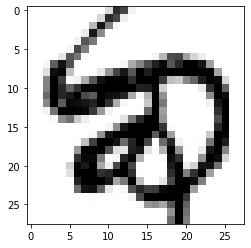

LABEL: 6
Index: 9
Large NN prediction:  6
NN prediction:  3


In [22]:
for index, input, prediction_large_NN, prediction_NN, label in zip(range(len(X_test)), X_test, large_NN_prediction, NN_prediction, y_test):
    if prediction_NN != label and prediction_large_NN == label:
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("Large NN prediction: ", large_NN_prediction[index])
        print("NN prediction: ", NN_prediction[index])
        break

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


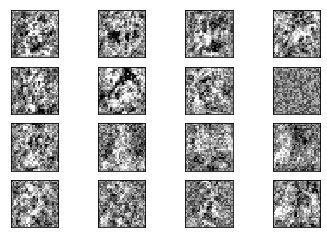

Weights with 4000 data points:


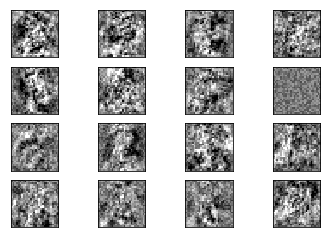

In [23]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

## ANSWER TO QUESTION 5
Just with a naked eye I cant recognize any particular pattern. I can only notice that the weights of the larger sample size resambles the ones with m_train = 600, but there seems to be sligthly more black points when m = 4000. What I'm guessing that is happening is that the NN is "shutting down" some neurons that don't give any relevant information and increasing the importance of the relevant ones.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [24]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

clf = SVC(kernel = "rbf", C = 10, gamma = 0.01)
clf.fit(X_train, y_train)
 
SVM_training_error = 1-clf.score(X_train, y_train)
SVM_test_error = 1-clf.score(X_test, y_test)

print ('RESULTS FOR SVM')

print ("Best SVM training error: %f" % SVM_training_error)
print ("Best SVM test error: %f" % SVM_test_error)

RESULTS FOR SVM
Best SVM training error: 0.000000
Best SVM test error: 0.083400


In [25]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C = 1)
regL2.fit(X_train, y_train)

regL2_training_error = 1-regL2.score(X_train, y_train)
regL2_test_error = 1-regL2.score(X_test, y_test)

print ('RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

print ("Best logistic regression training error: %f" % regL2_training_error)
print ("Best logistic regression test error: %f" % regL2_test_error)

RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Best logistic regression training error: 0.031000
Best logistic regression test error: 0.245000


/Users/lucaagosti/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

## ANSWER TO QUESTION 6
By comparing the test errors for the 3 classification methods we notice that the best performing one is the SVM algorithm with a test error of 0.083, followed by the NN with 0.145 and lastly the linear regression with 0.245. This results is also expected, in fact the NN works better when one can utilize the full power of the hidden layers and neurons to solve more complex problems. Our task is simple enough to be attacked quite well by the SVM, without recurring to the heavy machinary of the NN, or at least not a NN as simple as the one implemented in this notebook.